In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def mergeficheros(list_ficheros):
    with open(list_ficheros) as f:
        file_list = f.read().splitlines()

    nfil = 0
    T = pd.DataFrame()

    for file_path in file_list:
        nfil += 1
        Ti = pd.read_csv(file_path,delimiter ='\t',header=None)

        # Check table size
 #       if Ti.shape != (100, 10):
 #           print(f'WARNING: The size of the table in {file_path} is not standard, check the file')
 #       else:
 #           print('Table ok')

        Ti.columns = ['date', 'time', 'LCurrent', 'meanPM', 'stdPM', 'meanRefPD', 'stdRefPD', 'Temp', 'RH', 'samples']
        T = pd.concat([T, Ti])


    K = T['LCurrent'].unique()
    Tk = pd.DataFrame()
    Tav = pd.DataFrame()

    for k in K:
        mask = T['LCurrent'] == k
        count = sum(mask)

        Tk['LCurrent'] = [k]
        Tk['avPM'] = [T.loc[mask, 'meanPM'].mean()]
        Tk['stdPM'] = [T.loc[mask, 'meanPM'].std()]
        Tk['avRPD'] = [T.loc[mask, 'meanRefPD'].mean()]
        Tk['stdRPD'] = [T.loc[mask, 'meanRefPD'].std()]
        Tk['Temp'] = [T.loc[mask, 'Temp'].mean()]
        Tk['RH'] = [T.loc[mask, 'RH'].mean()]

        Tav = pd.concat([Tav, Tk])

    return T, Tav


ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Call the function with the list of files as an argument
list_of_files = '../data/Laser_Test_PM_MM/lista_Laser_532.txt'  # Provide the path to your file list
T, Tav = mergeficheros(list_of_files)

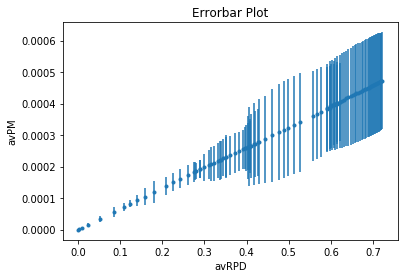

In [68]:

import matplotlib.pyplot as plt
# Assuming you already have Tav as a DataFrame containing 'avRPD', 'avPM', and 'stdPM' columns

# Extract the data
avRPD = Tav['avRPD']
avPM = Tav['avPM']
stdPM = Tav['stdPM']

# Create an errorbar plot
plt.errorbar(avRPD, avPM, yerr=stdPM, fmt='.')

# Add labels and title (customize as needed)
plt.xlabel('avRPD (V)')
plt.ylabel('avPM (W)')
plt.title('Errorbar Plot')

# Show the plot
plt.show()

In [51]:
Tav

,LCurrent,avPM,stdPM,avRPD,stdRPD,Temp,RH
0,200.000,3.800000e-07,1.201666e-06,0.000156,0.000025,25.77,48.9
0,215.051,1.650000e-06,9.947082e-07,0.002360,0.001243,25.78,48.9
0,223.856,6.200000e-06,1.686548e-06,0.009247,0.002424,25.81,48.9
0,230.103,1.630000e-05,4.083844e-06,0.024684,0.006094,25.82,48.9
0,234.949,3.378000e-05,9.519314e-06,0.051271,0.014304,25.80,49.0
...,...,...,...,...,...,...,...
0,299.114,4.670700e-04,1.560037e-04,0.713573,0.242339,25.79,48.4
0,299.339,4.688400e-04,1.558027e-04,0.716570,0.241092,25.80,48.4
0,299.561,4.702400e-04,1.554321e-04,0.717951,0.240685,25.83,48.3
0,299.782,4.713000e-04,1.543747e-04,0.719657,0.238931,25.83,48.3


In [65]:
Tav['avRPD'].values[0]

0.00015612